Problem 9: Particle in a harmonic potential (or tethered with a spring) under thermal motion

Consider a particle (in 1D) subjected to thermal motion and constrained by a harmonic potential 
$$V_{sp}(x) = \frac{k_s}{2}(x-x_0)^2$$
where $k_s$ is the potential strength and $x_0$ is a tethering point ($x_0=0$ can simply be taken). This model mimics a trap by laser tweezers for small colloidal particles.

(a) Calculate analytically $<(x-x_0)^2>$ as a function of $k_s$, which can be used for the calibration of the trap.

Particle dynamics can be described by the Langevin equation as 
$\frac{dx}{dt}=v, m\frac{dv}{dt} = -\gamma v - \frac{dV_{sp}(x)}{dx}+2\sqrt{\gamma k_b T} \frac {\xi}{\sqrt{\Delta t}}$

where m is the particle mass, $\gamma$ is the friction coefficient, $k_B T$ is the energy unit(can be set to $k_B T=1$ for simplicity), $\xi$ is a Gaussian random variable with zero mean and unit variance, and $\Delta t$ is the time step. The Langevin equation can be integrated using the velocity-Verlet algorithm as 

$$v(t+\frac{\Delta t}{2}) = v(t)+\frac{\Delta t}{2} \frac{f(t)}{m},$$
$$x(t+\Delta t)= x(t)+\Delta t v(t+\frac{\Delta t}{2})$$
compute $f(t+\Delta t)$
$$v(t+\Delta t) = v(t+\frac{\Delta t}{2})+ \frac{\Delta t}{2} \frac{f(t+\Delta t)}{m}$$
where f(t) is the total force that contains the friction, spring and random force terms from the Langevin equation.

(b) Implement this noisy oscillator and test your implementation by verifying the relation you obtained in (a). In the overdamped regime, particle mass should be irrelevant. Test the importance of particle mass by reducing particle mass or increasing the friction coefficeint.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import curve_fit
import numpy as np

def create_particle(x0,particle_list):
    particle_list.append(x0)

def force(gamma,ks,x,x0,v,dt):
    xi = np.random.normal()
    return -gamma*v-ks*(x-x0)+2*np.sqrt(gamma)*xi/np.sqrt(dt)

def velocity_verlet(x,v,dt,m,gamma,ks,x0):
    f_t = force(gamma,ks,x,x0,v,dt)
    v_half = v+dt/2*f_t/m
    x_next = x+dt*v_half
    f_next = force(gamma,ks,x_next,x0,v_half,dt)
    v_next = v_half+dt/2*f_next/m
    return x_next,v_next

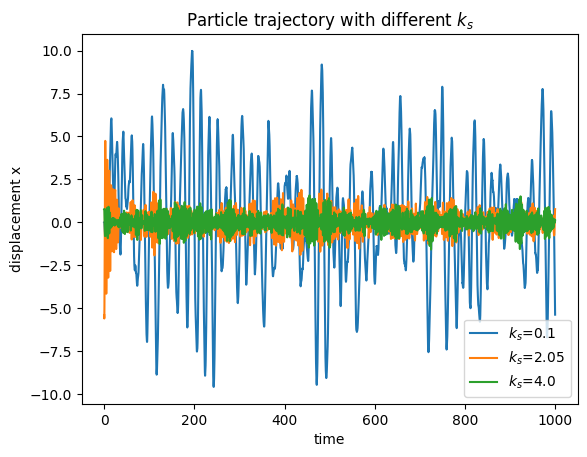

In [2]:
x0,x,v = 0,0,0
dt, m, gamma=0.01, 1 , 0.1
sim_time = 1000

ks_list = np.linspace(0.1,4,3)
for ks in ks_list:
    traj_list = []
    for i in range(int(sim_time/dt)):
        x,v = velocity_verlet(x,v,dt,m,gamma,ks,x0)
        traj_list.append(x)
    time_list = np.linspace(0,sim_time,len(traj_list))
    plt.plot(time_list,traj_list,label=r'$k_s$='+str(ks))
    data = np.column_stack((time_list,traj_list))
    np.save('./set8/ks_'+str(ks)+'_gamma_'+str(gamma)+'.dat',data,delimiter='/t',fmt='%d')
plt.title('Particle trajectory with different $k_s$')
plt.xlabel('time')
plt.ylabel('displacement x')
plt.legend()


        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


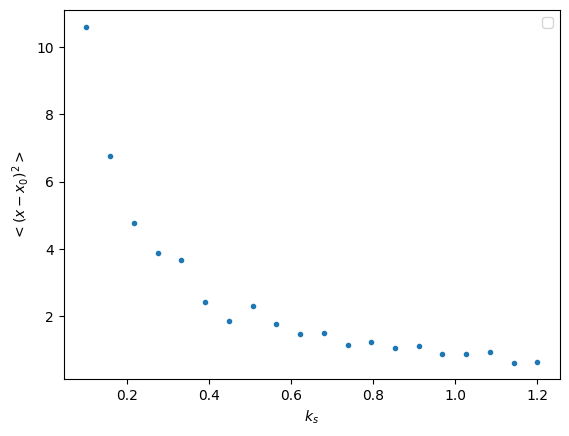

In [3]:
x0,x,v = 0,0,0
dt, m, gamma=0.01, 1 , 0.1
sim_time = 1000

ks_list = np.linspace(0.1,1.2,20)
variance_x_list = []
for ks in ks_list:
    traj_list = []
    for i in range(int(sim_time/dt)):
        x,v = velocity_verlet(x,v,dt,m,gamma,ks,x0)
        traj_list.append(x)
    traj_list = np.asarray(traj_list)
    variance_x = np.sum(traj_list**2)/len(traj_list)
    variance_x_list.append(variance_x)
plt.plot(ks_list,variance_x_list,'.')
plt.xlabel('$k_s$')
plt.ylabel(r'$<(x-x_0)^2>$')
plt.legend()


        
        

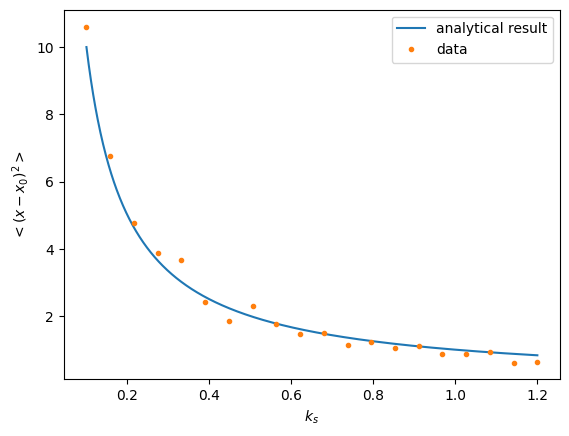

In [4]:
def func_variance_ks(ks):
    return 1/ks
ks_array = np.linspace(0.1,1.2,1000)
variance_x_array = func_variance_ks(ks_array)
plt.plot(ks_array,variance_x_array,label='analytical result')
plt.plot(ks_list,variance_x_list,'.',label = 'data')
plt.xlabel('$k_s$')
plt.ylabel(r'$<(x-x_0)^2>$')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


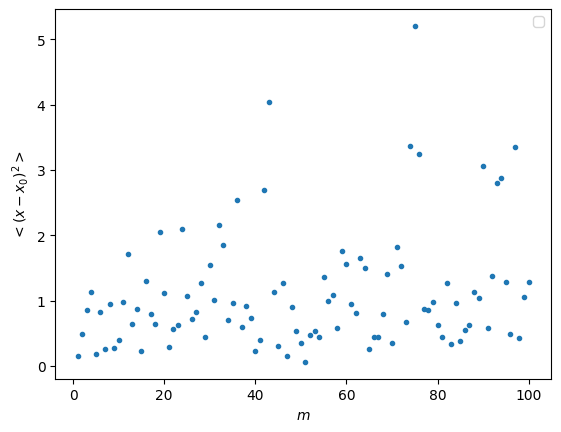

In [30]:
x0,x,v = 0,0,0
dt, m, gamma=0.01, 1 , 50
sim_time = 100
ks=1
m_list = np.linspace(1,100,100)
variance_x_list = []
for m in m_list:
    traj_list = []
    for i in range(int(sim_time/dt)):
        x,v = velocity_verlet(x,v,dt,m,gamma,ks,x0)
        traj_list.append(x)
    traj_list = np.asarray(traj_list)
    variance_x = np.sum(traj_list**2)/len(traj_list)
    variance_x_list.append(variance_x)
plt.plot(m_list,variance_x_list,'.')
plt.xlabel('$m$')
plt.ylabel(r'$<(x-x_0)^2>$')
plt.legend()
        
        

NameError: name 'sim_time' is not defined